In [15]:
import wfdb
import pandas as pd
import matplotlib.pyplot as plt
import statistics
import numpy as np
import pywt
import math
from scipy.signal import butter, lfilter
from scipy.fftpack import fft, ifft
from sklearn import preprocessing
import math
from sklearn.metrics import confusion_matrix
import itertools
from numpy.random import permutation
from numpy import sin, linspace, pi
from pylab import plot, show, title, xlabel, ylabel, subplot
from scipy import fft, arange
from scipy.signal import find_peaks
from scipy import signal

In [2]:
fileName=['a01','a02','a03','a04','a05','a06','a07','a08','a09','a10','a11','a12','a13','a14','a15','a16','a17','a18','a19','a20',
         'b01','b02','b03','b04','b05','c01','c02','c03','c04','c05','c06','c07','c08','c09','c10',
         'x01','x02','x03','x04','x05','x06','x07','x08','x09','x10','x11','x12','x13','x14','x15','x16','x17','x18','x19','x20']
mypath='C:/Users/sara/Documents/5anno/TESI/DataBase_PhysioNet/www.physionet.org/physiobank/database/apnea-ecg/'


In [3]:
def plotSpectrum(y,Fs):
    n = len(y) # length of the signal
    k = arange(n)
   # print(n)
    T = n/Fs
    frq = k/T # two sides frequency range
    #print(frq)
    frq = frq[range(30)] # one side frequency range

    Y = fft(y)/n # fft computing and normalization
    Y = Y[range(30)]

    plot(frq,abs(Y),'r') # plotting the spectrum
    xlabel('Freq (Hz)')
    ylabel('|Y(freq)|')


In [4]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [5]:
def calcolaPSD(lista):
  #  print('calcolaPSD')
   # meanHRV=statistics.mean(RR_intervals)
   # for i in range(0,len(lista)-1):
       # lista[i]=lista[i]-meanHRV
    #print(meanHRV)
    l=len(lista)
    lista=lista.tolist()
    for i in range (0,65536-l):
        lista.append(.0)
   # print(len(lista))
    dft= fft(lista)
    freq = np.fft.fftfreq(len(lista))
    #plt.plot(freq,dft)
    PSD = np.abs(dft) ** 2
   # PSD=scipy.signal.periodogram(FFT)
    #magnitude=PSD[0]
   # print(len(PSD),'h')
    PSD64=[]
    for i in range (0,64):
        PSD64.append(statistics.mean(PSD[1024*i:1024*(i+1)]))

    return PSD64

In [6]:
def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a

In [7]:
def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

In [8]:
def wrcoef(X, coef_type, coeffs, wavename, level):
    N = np.array(X).size
    a, ds = coeffs[0], list(reversed(coeffs[1:]))

    if coef_type =='a':
        return pywt.upcoef('a', a, wavename, level=level,take=N)[:N]
    elif coef_type == 'd':
        return pywt.upcoef('d', ds[level-1], wavename, level=level,take=N)[:N]
    else:
        raise ValueError("Invalid coefficient type: {}".format(coef_type))

In [9]:
index=22
recordname=mypath+fileName[index]
ann = wfdb.rdann(recordname, extension="apn")
time_apn=ann.sample/100
apn=ann.symbol

df = pd.read_pickle(mypath+'RR-EDR/'+fileName[index]+'EDR.pkl')

In [10]:
time_edr=df['time']
edr=df['edr']

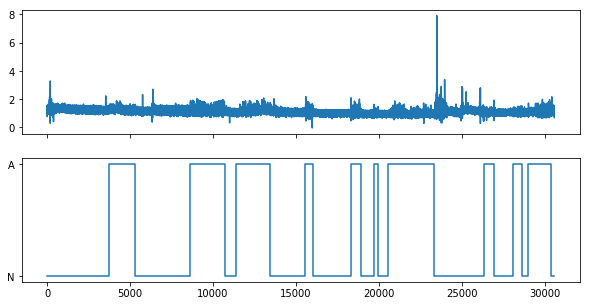

In [11]:
f, axarr = plt.subplots(2, sharex=True,figsize=(10,5))
axarr[0].plot(time_edr,edr)
axarr[1].step(time_apn,apn)


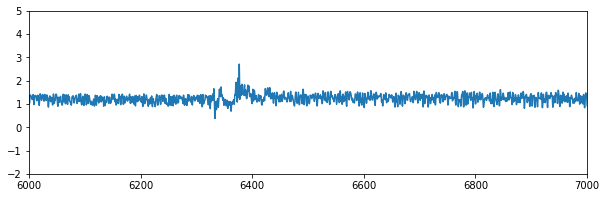

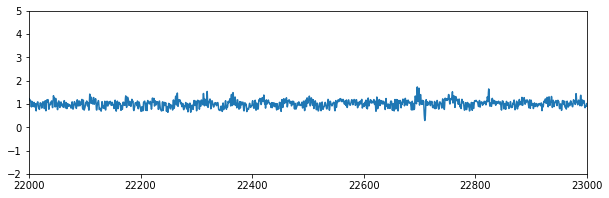

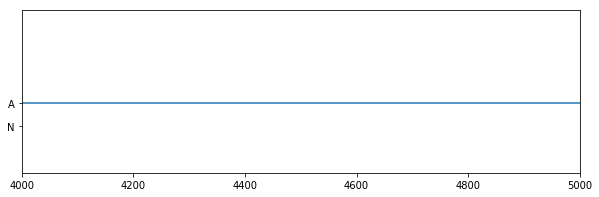

In [13]:
plt.figure(figsize=(10,3))
plt.axis([6000,7000,-2,5])
plt.plot(time_edr,edr)
plt.figure(figsize=(10,3))
plt.axis([22000,23000,-2,5])
plt.plot(time_edr,edr)
plt.figure(figsize=(10,3))
plt.axis([4000,5000,-2,5])
plt.step(time_apn,apn)


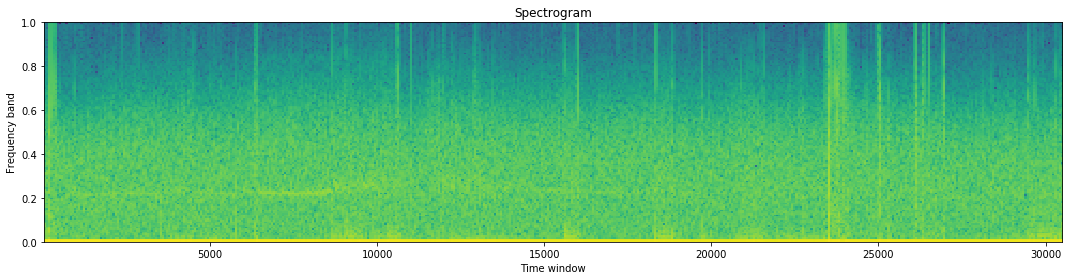

In [458]:
from scipy import signal
freqs, times, spectrogram = signal.spectrogram(edr,2)
plt.figure(figsize=(15, 4))
#plt.step(time_apn,apn,'r')
#plt.imshow(spectrogram, origin='lower')
plt.specgram(edr,Fs=2)

plt.title('Spectrogram')
plt.ylabel('Frequency band')
plt.xlabel('Time window')
plt.tight_layout()
#plt.step(time_apn,apn)

#plt.step(time_apn,apn,'r')

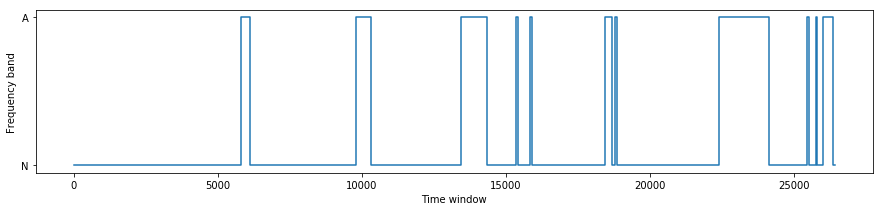

In [394]:
plt.figure(figsize=(15,3))
plt.ylabel('Frequency band')
plt.xlabel('Time window')
plt.step(time_apn,apn)


In [429]:
index=22
ratio=[]
start=[]
stop=[]
label=[]
df_features=pd.DataFrame()
recordname=mypath+fileName[index]
ann = wfdb.rdann(recordname, extension="apn")
time_apn=ann.sample/100
apn=ann.symbol
df = pd.read_pickle(mypath+'RR-EDR/'+fileName[index]+'EDR.pkl')
edr=df['edr']
time_edr=df['time']
k=0
while((k)*2<=len(edr)):
    start.append(time_edr[k*2])
    if((k+60)*2<=len(edr)):
        stop_value=(k+60)*2
    else:
        stop_value=len(edr)-1
    stop.append(time_edr[stop_value])
    freqs, psd = signal.welch(edr[k*2:stop_value],nperseg=120)
   # plt.figure(figsize=(5, 4))
    '''plt.semilogx(freqs, psd)
    plt.title('PSD: power spectral density')
    plt.xlabel('Frequency')
    plt.ylabel('Power')
    plt.tight_layout()'''
    VLF_freqs=[]
    VLF_value=[]
    LF_freqs=[]
    LF_value=[]
    HF_freqs=[]
    HF_value=[]
    peaks, _ = find_peaks(psd)
    peaks_freq=[freqs[i] for i in peaks]
    peaks_value=[psd[i] for i in peaks]
    #plt.scatter(peaks_freq,peaks_value)
    for i in range(0,len(freqs)):
        if(freqs[i]>=0.01 and freqs[i]<0.04):
            VLF_freqs.append(freqs[i])
            VLF_value.append(psd[i])
        elif(freqs[i]>=0.04 and freqs[i]<0.15):
            LF_freqs.append(freqs[i])
            LF_value.append(psd[i])
        elif(freqs[i]>=0.15 and freqs[i]<0.4):
            HF_freqs.append(freqs[i])
            HF_value.append(psd[i])
    areaVLF=np.trapz(VLF_value, VLF_freqs)
    areaLF=np.trapz(LF_value, LF_freqs)
    
    ratio.append(areaLF/areaVLF)
    k=k+60
for i in range(0,len(apn)):
        if(apn[i]=='A'):
            label.append(1)
        else:
            label.append(0)
df_features['ratio']=ratio    
df_features['start']=start    
df_features['stop']=stop    
df_features['time_apn']=time_apn  
df_features['label']=label

C:\Users\sara\Anaconda3\lib\site-packages\scipy\signal\spectral.py:1773: UserWarning: nperseg = 120 is greater than input length  = 58, using nperseg = 58
  .format(nperseg, input_length))


In [399]:
time_edr[5120*2]

5120.651623595293

In [405]:
index=22
ratio=[]
start=[]
stop=[]
label=[]
df_features=pd.DataFrame()
recordname=mypath+fileName[index]
ann = wfdb.rdann(recordname, extension="apn")
time_apn=ann.sample/100
apn=ann.symbol
df = pd.read_pickle(mypath+'RR-EDR/'+fileName[index]+'EDR.pkl')
edr=df['edr']
time_edr=df['time']
k=0
while((k)*2<=len(edr)):
    start.append(time_edr[k*2])
    if((k+60)*2<=len(edr)):
        stop_value=(k+60)*2
    else:
        stop_value=len(edr)-1
    stop.append(time_edr[stop_value])
    freqs, psd = signal.welch(edr[k*2:stop_value],nperseg=120)
   # plt.figure(figsize=(5, 4))
    '''plt.semilogx(freqs, psd)
    plt.title('PSD: power spectral density')
    plt.xlabel('Frequency')
    plt.ylabel('Power')
    plt.tight_layout()'''
    VLF_freqs=[]
    VLF_value=[]
    LF_freqs=[]
    LF_value=[]
    HF_freqs=[]
    HF_value=[]
    peaks, _ = find_peaks(psd)
    peaks_freq=[freqs[i] for i in peaks]
    peaks_value=[psd[i] for i in peaks]
    #plt.scatter(peaks_freq,peaks_value)
    for i in range(0,len(peaks_freq)):
        if(peaks_freq[i]>=0.01 and peaks_freq[i]<0.04):
            VLF_freqs.append(peaks_freq[i])
            VLF_value.append(peaks_value[i])
        elif(peaks_freq[i]>=0.04 and peaks_freq[i]<0.15):
            LF_freqs.append(peaks_freq[i])
            LF_value.append(peaks_value[i])
        elif(peaks_freq[i]>=0.15 and peaks_freq[i]<0.4):
            HF_freqs.append(peaks_freq[i])
            HF_value.append(peaks_value[i])
    if(len(VLF_value)!=0):
        maxVLFpeak_value=max(VLF_value)
        indice=peaks_value.index(maxVLFpeak_value)
        maxVLFpeak_freq=peaks_freq[indice]
    else:
        maxVLFpeak_value=0.1
    maxLFpeak_value=max(LF_value)
    indice=peaks_value.index(maxLFpeak_value)
    maxLFpeak_freq=peaks_freq[indice]
    '''plt.scatter(maxVLFpeak_freq,maxVLFpeak_value)
    plt.scatter(maxLFpeak_freq,maxLFpeak_value)
    plt.axvline(0.01,color='k')
    plt.axvline(0.04,color='k')
    plt.axvline(0.15,color='k')
    plt.axvline(0.4,color='k')'''
    ratio.append(maxLFpeak_value/maxVLFpeak_value)
    k=k+60
for i in range(0,len(apn)):
        if(apn[i]=='A'):
            label.append(1)
        else:
            label.append(0)
df_features['ratio']=ratio    
df_features['start']=start    
df_features['stop']=stop    
df_features['time_apn']=time_apn  
df_features['label']=label

C:\Users\sara\Anaconda3\lib\site-packages\scipy\signal\spectral.py:1773: UserWarning: nperseg = 120 is greater than input length  = 58, using nperseg = 58
  .format(nperseg, input_length))


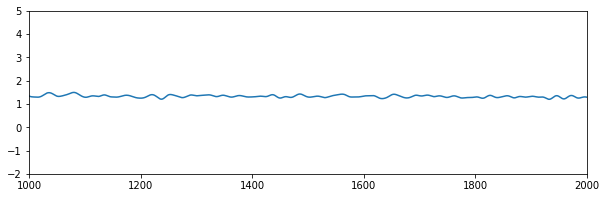

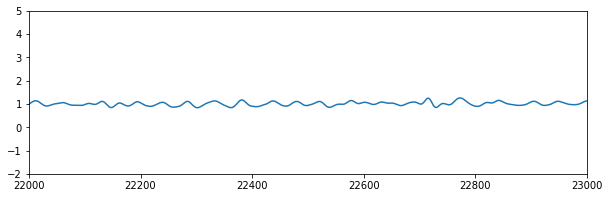

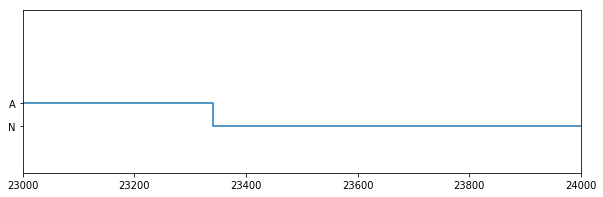

In [372]:
plt.figure(figsize=(10,3))
plt.axis([1000,2000,-2,5])
plt.plot(time_edr,y)
plt.figure(figsize=(10,3))
plt.axis([22000,23000,-2,5])
plt.plot(time_edr,y)
plt.figure(figsize=(10,3))
plt.axis([23000,24000,-2,5])
plt.step(time_apn,apn)

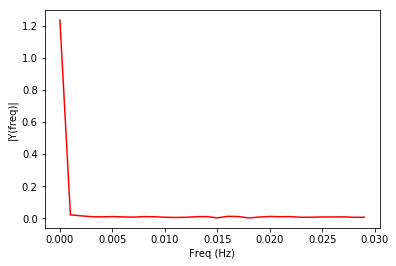

In [355]:
statistics.variance(y[9000*2:10000*2])

1.0493773839174403e-07

In [289]:
statistics.variance(y[6000*2:7000*2])

0.00243241146936888

In [459]:
wavelet = pywt.Wavelet('db4')
from pywt import wavedec
data=edr
coeffs = wavedec(data, 'db4', level=9)
level = 9
A9 = wrcoef(data, 'a', coeffs, 'db4', level)
D9 = wrcoef(data, 'd', coeffs, 'db4', level)
D8 = wrcoef(data, 'd', coeffs, 'db4', 8)
D7 = wrcoef(data, 'd', coeffs, 'db4', 7)
D6 = wrcoef(data, 'd', coeffs, 'db4', 6)
D5 = wrcoef(data, 'd', coeffs, 'db4', 5)
D4 = wrcoef(data, 'd', coeffs, 'db4', 4)
D3 = wrcoef(data, 'd', coeffs, 'db4', 3)
D2 = wrcoef(data, 'd', coeffs, 'db4', 2)
D1 = wrcoef(data, 'd', coeffs, 'db4', 1)

Text(0,0.5,'D9')

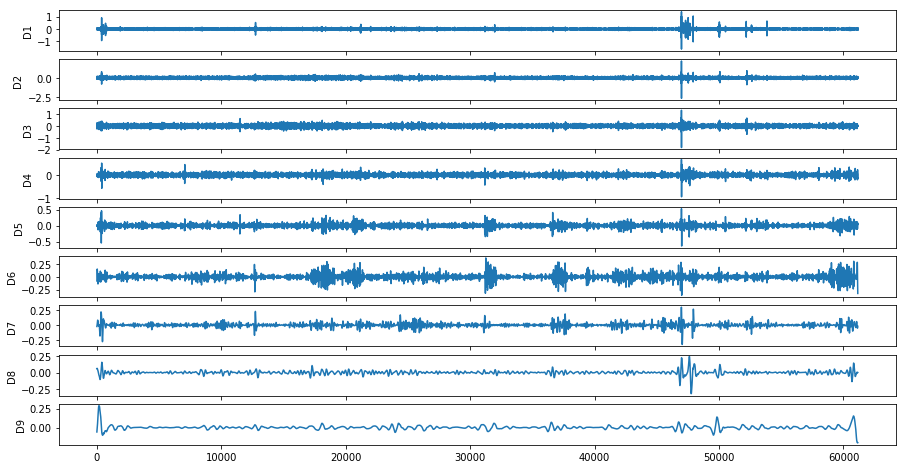

In [460]:
f, axarr = plt.subplots(9, sharex=True,figsize=(15,8))
#axarr[0].axis([17000*2,20000*2,-3,3])
axarr[0].plot(D1)
axarr[0].set_ylabel('D1')
axarr[1].plot(D2)
axarr[1].set_ylabel('D2')
axarr[2].plot(D3)
axarr[2].set_ylabel('D3')
axarr[3].plot(D4)
axarr[3].set_ylabel('D4')
axarr[4].plot(D5)
axarr[4].set_ylabel('D5')
axarr[5].plot(D6)
axarr[5].set_ylabel('D6')
axarr[6].plot(D7)
axarr[6].set_ylabel('D7')
axarr[7].plot(D8)
axarr[7].set_ylabel('D8')
axarr[8].plot(D9)
axarr[8].set_ylabel('D9')

In [654]:
recordname=mypath+fileName[4]
record = wfdb.rdsamp(recordname)
dfECG=pd.DataFrame()
ecg=record[0]
Fs_ecg=record[1]['fs']
intervallo=len(ecg)/(len(ecg)*Fs_ecg)
time_ecg=[]
for i in range(0,len(ecg)):
    time_ecg.append(intervallo*i)
dfECG['time']=time_ecg
dfECG['ecg']=ecg

In [462]:
time_apn2=[i*2 for i in time_apn]


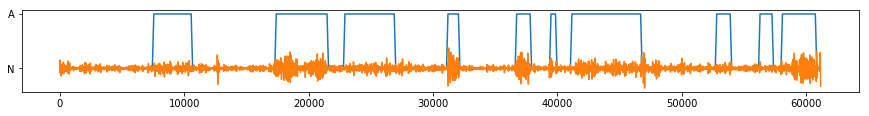

In [463]:
plt.figure(figsize=(15,1.5))
plt.plot(time_apn2,apn)
plt.plot(D6)


In [526]:
z=np.array(edr[39000:40000])


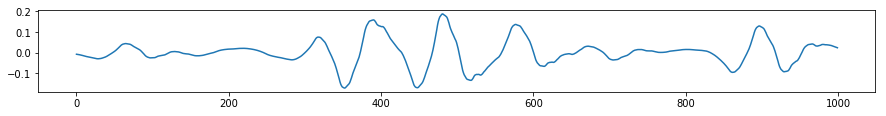

In [479]:
plt.figure(figsize=(15,1.5))
#plt.plot(edr[12000:13000])
plt.plot(D6[39000:40000])
#plt.plot(z)

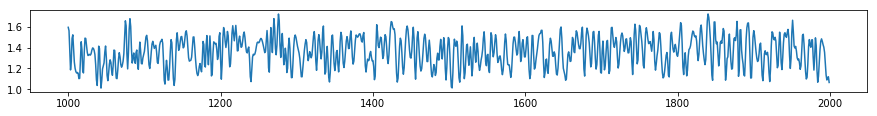

In [480]:
plt.figure(figsize=(15,1.5))
plt.plot(edr[1000:2000])

In [190]:
statistics.variance(D5[1000*2:2000*2])

0.0016496335106030305

In [191]:
statistics.variance(D5[22000*2:23000*2])

0.00016337576789136687

# Feature Extraction PSD

In [464]:
dfEDR = pd.read_pickle( mypath+'RR-EDR/'+fileName[index]+'EDR.pkl')
dfEDR=dfEDR.dropna()
#RR_intervals=dfQRS['rr']
df = pd.read_pickle( mypath+'DivisioneDB/'+fileName[index]+'divisione.pkl')

In [465]:
WAV=np.zeros((len(df),16))
df_features=pd.DataFrame()
df_WAV=pd.DataFrame()
for i in range (0,len(df)):
    var=[]

    #print(i)
    #data=edr[i*120:(i+1)*120]
    #PSD64=calcolaPSD(data)
    #PSD32=PSD64[0:33]
    #ffts.append(PSD32)
    var.append(statistics.variance(D1[i*120:(i+1)*120]))
    var.append(statistics.variance(D2[i*120:(i+1)*120]))
    var.append(statistics.variance(D3[i*120:(i+1)*120]))
    var.append(statistics.variance(D4[i*120:(i+1)*120]))
    var.append(statistics.variance(D5[i*120:(i+1)*120]))
    var.append(statistics.variance(D6[i*120:(i+1)*120]))
    var.append(statistics.variance(D7[i*120:(i+1)*120]))
    var.append(statistics.variance(D8[i*120:(i+1)*120]))
    var.append(statistics.mean(D1[i*120:(i+1)*120]))
    var.append(statistics.mean(D2[i*120:(i+1)*120]))
    var.append(statistics.mean(D3[i*120:(i+1)*120]))
    var.append(statistics.mean(D4[i*120:(i+1)*120]))
    var.append(statistics.mean(D5[i*120:(i+1)*120]))
    var.append(statistics.mean(D6[i*120:(i+1)*120]))
    var.append(statistics.mean(D7[i*120:(i+1)*120]))
    var.append(statistics.mean(D8[i*120:(i+1)*120]))
    for k in range (0,16):
        WAV[i][k]=var[k]
df_WAV=pd.DataFrame(WAV)
   # df_features = pd.concat([df_features, df_PSD], axis=1, sort=False)

In [468]:
label=[]
for i in range(0,len(df['label'])):
        if(df['label'][i]=='A'):
            label.append(1)
        else:
            label.append(0)
df_WAV['label']=label
df_tot=df_WAV

In [195]:
'''PSD=np.zeros((len(df),32))
df_features=pd.DataFrame()
ffts=[]
for i in range (0,len(df)):
    #print(i)
    data=edr[i*120:(i+1)*120]
    PSD64=calcolaPSD(data)
    PSD32=PSD64[0:33]
    #ffts.append(PSD32)
    for k in range (0,32):
        PSD[i][k]=PSD32[k]
df_PSD=pd.DataFrame(PSD)
   # df_features = pd.concat([df_features, df_PSD], axis=1, sort=False)'''

'PSD=np.zeros((len(df),32))\ndf_features=pd.DataFrame()\nffts=[]\nfor i in range (0,len(df)):\n    #print(i)\n    data=edr[i*120:(i+1)*120]\n    PSD64=calcolaPSD(data)\n    PSD32=PSD64[0:33]\n    #ffts.append(PSD32)\n    for k in range (0,32):\n        PSD[i][k]=PSD32[k]\ndf_PSD=pd.DataFrame(PSD)\n   # df_features = pd.concat([df_features, df_PSD], axis=1, sort=False)'

In [196]:
'''label=[]
for i in range(0,len(df['label'])):
        if(df['label'][i]=='A'):
            label.append(1)
        else:
            label.append(0)
df_PSD['label']=label
df_tot=df_PSD'''

"label=[]\nfor i in range(0,len(df['label'])):\n        if(df['label'][i]=='A'):\n            label.append(1)\n        else:\n            label.append(0)\ndf_PSD['label']=label\ndf_tot=df_PSD"

# classificazione


In [469]:
# Randomly shuffle the index of nba.
#df_tot=df_features
random_indices = permutation(df_tot.index)
# Set a cutoff for how many items we want in the test set (in this case 1/3 of the items)
test_cutoff = math.floor(len(df_tot)*0.3)
# Generate the test set by taking the first 1/3 of the randomly shuffled indices.
test = df_tot.loc[random_indices[1:test_cutoff]]
# Generate the train set with YYYYYthe rest of the data.
train = df_tot.loc[random_indices[test_cutoff:]]

#train,test= train_test_split(df_a, test_size=0.3, random_state=42)

In [471]:

df_tot.columns

Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 'label'], dtype='object')

In [472]:
x_columns = [ 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
y_column = ['label']

In [473]:
from sklearn.neighbors import KNeighborsRegressor
# Create the knn model.
# Look at the five closest neighbors.
knn = KNeighborsRegressor(n_neighbors=1)
# Fit the model on the training data.
classifier=knn.fit(train[x_columns], train[y_column])
# Make point predictions on the test set using the fit model.
predictions = knn.predict(test[x_columns])

y_pred = classifier.fit(train[x_columns], train[y_column]).predict(test[x_columns])
for i in range(0,len(y_pred)):
    y_pred[i]=math.floor(y_pred[i])

In [474]:
cnf_matrix = confusion_matrix(test[y_column]['label'], y_pred)

Confusion matrix, without normalization
[[70 21]
 [26 34]]


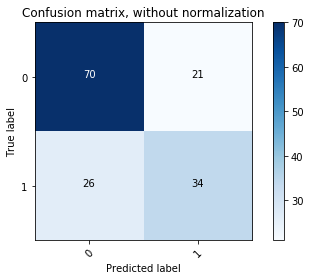

In [475]:
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['0','1'],
                      title='Confusion matrix, without normalization')

Normalized confusion matrix
[[0.76923077 0.23076923]
 [0.43333333 0.56666667]]


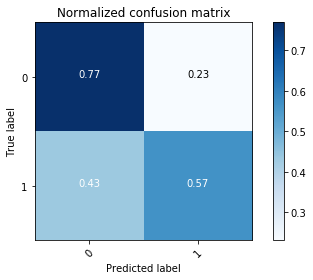

In [476]:
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['0','1'], normalize=True,
                      title='Normalized confusion matrix')

In [477]:
from sklearn.metrics import classification_report
print(classification_report(test[y_column], y_pred))  

             precision    recall  f1-score   support

          0       0.73      0.77      0.75        91
          1       0.62      0.57      0.59        60

avg / total       0.69      0.69      0.69       151



In [205]:
from sklearn.svm import SVC  
svclassifier = SVC(kernel='linear')  
y_pred = svclassifier.fit(train[x_columns], train[y_column]).predict(test[x_columns])  
for i in range(0,len(y_pred)):
    y_pred[i]=math.floor(y_pred[i])

C:\Users\sara\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [206]:
cnf_matrix = confusion_matrix(test[y_column]['label'], y_pred)

Confusion matrix, without normalization
[[126   0]
 [ 28   0]]


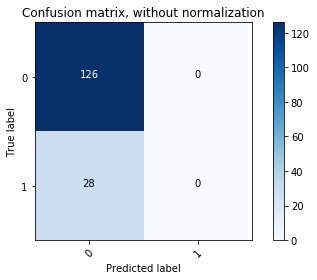

In [207]:
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['0','1'],
                      title='Confusion matrix, without normalization')

Normalized confusion matrix
[[1. 0.]
 [1. 0.]]


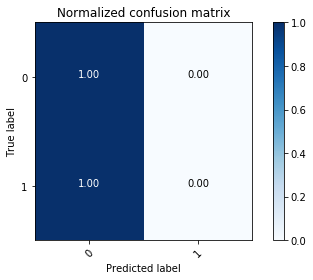

In [208]:
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['0','1'], normalize=True,
                      title='Normalized confusion matrix')

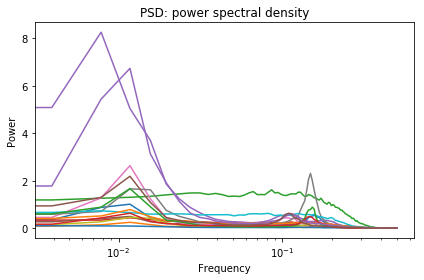

In [49]:
f=[]
p=[]
for index in range (0,16):
    #print(index)
    df = pd.read_pickle(mypath+'RR-EDR/'+fileName[index]+'EDR.pkl')
    freqs, psd = signal.welch(df['edr'])
    f.append(freqs)
    p.append(psd)
for i in range(0,len(f)):
    plt.semilogx(f[i], p[i])
    plt.title('PSD: power spectral density')
    plt.xlabel('Frequency')
    plt.ylabel('Power')
    plt.tight_layout()

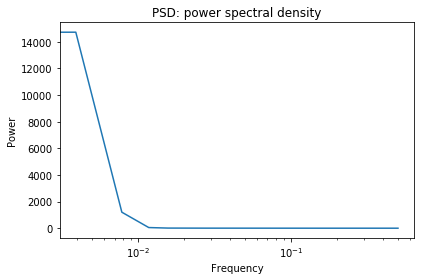

In [30]:
f=[]
p=[]
for index in range (33,34):
    #print(index)
    df = pd.read_pickle(mypath+'RR-EDR/'+fileName[index]+'EDR.pkl')
    freqs, psd = signal.welch(df['edr'])
    f.append(freqs)
    p.append(psd)
for i in range(0,len(f)):
    plt.semilogx(f[i], p[i])
    plt.title('PSD: power spectral density')
    plt.xlabel('Frequency')
    plt.ylabel('Power')
    plt.tight_layout()